# Import Python libraries and directory of results

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.api as sm
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
#from ITS_lib.ITS_functions import ITS_plot, ITS_subplots

In [7]:
#from google.colab import drive
#drive.mount("/content/drive")

#!pip install pingouin

#!pip install statannotations
#!pip install statsmodels
#!pip install scikit_posthocs

In [8]:
from pathlib import Path

#DATA = Path("/content/drive/My Drive/BBL/GP_ITS")
DATA = Path("C:/Users/Teo/Downloads")

# Create one table with LAT and MED results

In [ ]:
ITS_lat = pd.read_csv(DATA / 'result_GP_LAT.txt', sep = '\t', header = None)
ITS_lat.columns = ['Filename','BV_TV', 'pBV_TV', 'rBV_TV', 'aBV_TV', 'pBV_BV', 'rBV_BV', 'pTb.N', 'rTb.N', 'pTb.Th',
                   'rTb.Th', 'pTb.S', 'rTb.l', 'RR_junc', 'PR_junc', 'PP junc','NA']

In [ ]:
ITS_lat['PR_ratio'] = ITS_lat.apply(
    lambda row:(row.pBV_TV)/(row.rBV_TV), axis=1)

In [ ]:
ITS_lat['ID'] = ITS_lat['Filename'].astype(str).str.split('_').str[0]
ITS_lat['Location'] = ITS_lat['Filename'].astype(str).str.split('_').str[1]
ITS_lat['Subregion'] = ITS_lat['Filename'].astype(str).str.split('_').str[2]

In [ ]:
ITS_med = pd.read_csv(DATA / 'result_GP_MED.txt', sep = '\t', header = None)
ITS_med.columns = ['Filename','BV_TV', 'pBV_TV', 'rBV_TV', 'aBV_TV', 'pBV_BV', 'rBV_BV', 'pTb.N', 'rTb.N', 'pTb.Th',
                   'rTb.Th', 'pTb.S', 'rTb.l', 'RR_junc', 'PR_junc', 'PP junc','NA']

In [ ]:
ITS_med['PR_ratio'] = ITS_med.apply(
    lambda row:(row.pBV_TV)/(row.rBV_TV), axis=1)

In [ ]:
ITS_med['ID'] = ITS_med['Filename'].astype(str).str.split('_').str[0]
ITS_med['Location'] = ITS_med['Filename'].astype(str).str.split('_').str[1]
ITS_med['Subregion'] = ITS_med['Filename'].astype(str).str.split('_').str[2]

In [ ]:
ITS_merge = pd.concat([ITS_med,ITS_lat])

In [ ]:
GP_ID = pd.read_csv(DATA /'GP_fileID.txt', header = None, sep = '\t')
GP_ID.columns = ['GP','Month', 'ID','Location']

In [ ]:
ITS_merge = pd.merge(ITS_merge, GP_ID, left_on = 'ID', right_on = 'ID')

In [ ]:
#ITS_merge[(ITS_merge.Location == ['LF'] | ITS_merge.Location == ['LT']), 'Left/Right'] = 'Left'
#ITS_merge["Left/Right"] = ITS_merge.Location.where((ITS_merge.Location == ['LF']) , "Left")

In [ ]:
ITS_merge.head()

# Create one table with ITS results

In [9]:
ITS = pd.read_csv(DATA / 'result_gp_longitudinal_erode.txt', sep = '\t', header = None)
ITS.columns = ['Filename','BV_TV', 'pBV_TV', 'rBV_TV', 'aBV_TV', 'pBV_BV', 'rBV_BV', 'pTb_N', 'rTb_N', 'pTb_Th',
                   'rTb_Th', 'pTb_S', 'rTb_l', 'RR_junc', 'PR_junc', 'PP junc']
ITS['PR_ratio'] = ITS.apply(
    lambda row:(row.pBV_TV)/(row.rBV_TV), axis=1)
ITS['PR_num_ratio'] = ITS.apply(
    lambda row:(row.pTb_N)/(row.rTb_N), axis=1)
ITS['ID'] = ITS['Filename'].astype(str).str.split('_').str[0]
ITS['Location'] = ITS['Filename'].astype(str).str.split('_').str[1]
ITS['Subregion'] = ITS['Filename'].astype(str).str.split('_').str[2]
ITS['Location_Subregion'] = ITS['Location'] + '_' + ITS['Subregion']
ITS.head()

,Filename,BV_TV,pBV_TV,rBV_TV,aBV_TV,pBV_BV,rBV_BV,pTb_N,rTb_N,pTb_Th,...,rTb_l,RR_junc,PR_junc,PP junc,PR_ratio,PR_num_ratio,ID,Location,Subregion,Location_Subregion
0,E0016708_LF_LAT_ITS;1,0.28443,0.14333,0.14110,0.11553,0.50392,0.49608,3.18258,3.69329,0.09978,...,0.36209,29.37657,63.02933,46.63310,1.015804,0.861719,E0016708,LF,LAT,LF_LAT
1,E0016708_LF_MED_ITS;1,0.34058,0.21124,0.12934,0.15267,0.62024,0.37976,3.47862,3.52558,0.10721,...,0.35681,23.13486,64.18883,54.73330,1.633215,0.986680,E0016708,LF,MED,LF_MED
2,E0016708_LT_LAT_ITS;1,0.31984,0.16814,0.15170,0.12054,0.52570,0.47430,3.35284,3.81937,0.10205,...,0.36523,29.19542,72.04979,55.57456,1.108372,0.877852,E0016708,LT,LAT,LT_LAT
3,E0016708_LT_MED_ITS;1,0.36423,0.21199,0.15223,0.12385,0.58204,0.41796,3.50350,3.84579,0.10753,...,0.35573,33.07125,75.85184,60.33923,1.392564,0.910996,E0016708,LT,MED,LT_MED
4,E0016708_RF_LAT_ITS;1,0.28139,0.13513,0.14626,0.11004,0.48023,0.51977,3.17381,3.78175,0.10055,...,0.35089,33.77932,64.49830,47.42579,0.923903,0.839244,E0016708,RF,LAT,RF_LAT


In [10]:
GP_ID = pd.read_csv(DATA /'GP_fileID.txt', header = None, sep = '\t')
GP_ID.columns = ['GP','Month', 'ID','Location']

In [11]:
ITS_merge = pd.merge(ITS, GP_ID, left_on = 'ID', right_on = 'ID')
ITS_merge.head()

,Filename,BV_TV,pBV_TV,rBV_TV,aBV_TV,pBV_BV,rBV_BV,pTb_N,rTb_N,pTb_Th,...,PP junc,PR_ratio,PR_num_ratio,ID,Location_x,Subregion,Location_Subregion,GP,Month,Location_y
0,E0016708_LF_LAT_ITS;1,0.28443,0.14333,0.14110,0.11553,0.50392,0.49608,3.18258,3.69329,0.09978,...,46.63310,1.015804,0.861719,E0016708,LF,LAT,LF_LAT,GP_8,2,NaN
1,E0016708_LF_MED_ITS;1,0.34058,0.21124,0.12934,0.15267,0.62024,0.37976,3.47862,3.52558,0.10721,...,54.73330,1.633215,0.986680,E0016708,LF,MED,LF_MED,GP_8,2,NaN
2,E0016708_LT_LAT_ITS;1,0.31984,0.16814,0.15170,0.12054,0.52570,0.47430,3.35284,3.81937,0.10205,...,55.57456,1.108372,0.877852,E0016708,LT,LAT,LT_LAT,GP_8,2,NaN
3,E0016708_LT_MED_ITS;1,0.36423,0.21199,0.15223,0.12385,0.58204,0.41796,3.50350,3.84579,0.10753,...,60.33923,1.392564,0.910996,E0016708,LT,MED,LT_MED,GP_8,2,NaN
4,E0016708_RF_LAT_ITS;1,0.28139,0.13513,0.14626,0.11004,0.48023,0.51977,3.17381,3.78175,0.10055,...,47.42579,0.923903,0.839244,E0016708,RF,LAT,RF_LAT,GP_8,2,NaN


In [12]:
ITS_merge.groupby(['Location_Subregion', 'Month']).mean()

BV_TV    pBV_TV    rBV_TV    aBV_TV    pBV_BV  \
Location_Subregion Month                                                     
LF_LAT             2      0.293319  0.159816  0.133504  0.130721  0.542029   
                   3      0.338433  0.215520  0.122909  0.160969  0.628531   
                   4      0.359637  0.236672  0.122963  0.165115  0.657262   
                   5      0.429800  0.325250  0.104550  0.156890  0.756740   
LF_MED             2      0.339298  0.211059  0.128240  0.152323  0.617983   
                   3      0.391141  0.276291  0.114850  0.184721  0.703321   
                   4      0.419695  0.307210  0.112487  0.202145  0.732005   
                   5      0.389620  0.297145  0.092470  0.143040  0.747200   
LT_LAT             2      0.299716  0.134928  0.164789  0.094838  0.446463   
                   3      0.378690  0.236888  0.141801  0.137451  0.606476   
                   4      0.442588  0.321393  0.121197  0.165123  0.721170   
LT_MED             2      0.340076  0.187476  0.152599  0.138107  0.548689   
                   3      0.414385  0.288271  0.126116  0.178146  0.690802   
                   4      0.487787  0.370722  0.117063  0.209958  0.760373   
RF_LAT             2      0.283791  0.149561  0.134230  0.122212  0.524223   
                   3      0.346981  0.216185  0.130796  0.154445  0.610981   
                   4      0.370637  0.263423  0.107217  0.158855  0.702058   
                   5      0.405900  0.324290  0.081610  0.223090  0.799035   
RF_MED             2      0.336436  0.209856  0.126580  0.159848  0.622358   
                   3      0.383801  0.253171  0.130630  0.175000  0.656611   
                   4      0.418070  0.311960  0.106110  0.196183  0.741762   
                   5      0.420310  0.330407  0.089910  0.213607  0.785443   
RT_LAT             2      0.295827  0.136126  0.159701  0.097443  0.451879   
                   3      0.380751  0.236312  0.144439  0.142588  0.615848   
                   4      0.423988  0.292075  0.131912  0.168832  0.683125   
                   5      0.445813  0.334377  0.111443  0.191613  0.750190   
RT_MED             2      0.343703  0.180447  0.163258  0.141522  0.517456   
                   3      0.418179  0.263256  0.154922  0.167110  0.628703   
                   4      0.474007  0.335215  0.138792  0.195905  0.707312   
                   5      0.458937  0.339100  0.119837  0.203050  0.740017   

                            rBV_BV     pTb_N     rTb_N    pTb_Th    rTb_Th  \
Location_Subregion Month                                                     
LF_LAT             2      0.457971  3.220712  3.585189  0.102926  0.097131   
                   3      0.371469  3.378586  3.483381  0.110520  0.096406   
                   4      0.342738  3.504738  3.500215  0.112200  0.096310   
                   5      0.243260  3.939960  3.352290  0.109040  0.094590   
LF_MED             2      0.382017  3.371867  3.471218  0.111943  0.099831   
                   3      0.296679  3.518963  3.371709  0.119129  0.098119   
                   4      0.267995  3.632223  3.442398  0.120090  0.094172   
                   5      0.252800  3.709270  3.257305  0.107330  0.092335   
LT_LAT             2      0.553537  3.131606  3.890730  0.101389  0.095878   
                   3      0.393524  3.432422  3.596944  0.114827  0.099045   
                   4      0.278830  3.758328  3.426317  0.115795  0.098320   
LT_MED             2      0.451311  3.397152  3.763696  0.106851  0.096326   
                   3      0.309198  3.601150  3.479905  0.119526  0.097646   
                   4      0.239627  3.826108  3.393272  0.120548  0.096645   
RF_LAT             2      0.475777  3.151507  3.591742  0.103952  0.097277   
                   3      0.389019  3.433892  3.619612  0.110362  0.095333   
                   4      0.297942  3.496215  3.300147  0.116027  0.095723   
                   5      0.200965  3.532125  2.77

In [13]:
ITS_merge.groupby(['Location_Subregion', 'Month']).std()

BV_TV    pBV_TV    rBV_TV    aBV_TV    pBV_BV  \
Location_Subregion Month                                                     
LF_LAT             2      0.022897  0.031860  0.020160  0.027683  0.080629   
                   3      0.051973  0.059599  0.023051  0.039982  0.097486   
                   4      0.018012  0.025539  0.015772  0.016330  0.047674   
                   5           NaN       NaN       NaN       NaN       NaN   
LF_MED             2      0.031792  0.036800  0.010388  0.028454  0.057170   
                   3      0.039407  0.047830  0.025362  0.032639  0.076359   
                   4      0.022482  0.019388  0.012140  0.003836  0.024279   
                   5      0.159552  0.148641  0.010904  0.072676  0.075519   
LT_LAT             2      0.027363  0.029464  0.014761  0.019579  0.064793   
                   3      0.072395  0.087617  0.020490  0.038771  0.126899   
                   4      0.057008  0.062997  0.016167  0.022723  0.056925   
LT_MED             2      0.031816  0.030717  0.014157  0.018638  0.053714   
                   3      0.049576  0.053927  0.013161  0.037661  0.057260   
                   4      0.045222  0.050676  0.041395  0.031613  0.074469   
RF_LAT             2      0.028503  0.029178  0.015508  0.022978  0.062502   
                   3      0.047914  0.070400  0.031601  0.036831  0.130263   
                   4      0.043562  0.065163  0.022801  0.019368  0.091411   
                   5      0.005247  0.001895  0.007142  0.024975  0.014998   
RF_MED             2      0.012926  0.028795  0.020379  0.028282  0.067303   
                   3      0.019683  0.047247  0.034008  0.029017  0.104333   
                   4      0.042834  0.056896  0.023676  0.022635  0.071908   
                   5      0.044077  0.042637  0.017450  0.032231  0.039195   
RT_LAT             2      0.037886  0.040624  0.012504  0.022105  0.082205   
                   3      0.031779  0.051944  0.028864  0.031467  0.093988   
                   4      0.041558  0.058011  0.018482  0.025071  0.075333   
                   5      0.001701  0.027772  0.029479  0.037043  0.065181   
RT_MED             2      0.047495  0.053372  0.022658  0.030278  0.086140   
                   3      0.030456  0.043570  0.035645  0.028658  0.086046   
                   4      0.036762  0.029497  0.019814  0.029131  0.033395   
                   5      0.039051  0.019800  0.020324  0.038365  0.022458   

                            rBV_BV     pTb_N     rTb_N    pTb_Th    rTb_Th  \
Location_Subregion Month                                                     
LF_LAT             2      0.080629  0.130781  0.284890  0.003636  0.003658   
                   3      0.097486  0.176685  0.301210  0.006978  0.003926   
                   4      0.047674  0.062772  0.210418  0.003194  0.004080   
                   5           NaN       NaN       NaN       NaN       NaN   
LF_MED             2      0.057170  0.163120  0.189984  0.003318  0.003855   
                   3      0.076359  0.128109  0.322532  0.003759  0.003685   
                   4      0.024279  0.051051  0.166316  0.002701  0.002766   
                   5      0.075519  0.398992  0.117486  0.015033  0.000573   
LT_LAT             2      0.064793  0.213617  0.145880  0.003798  0.003169   
                   3      0.126899  0.365095  0.202314  0.007638  0.002695   
                   4      0.056925  0.199842  0.198351  0.006286  0.003855   
LT_MED             2      0.053714  0.170548  0.146112  0.002470  0.002939   
                   3      0.057260  0.227388  0.147307  0.007226  0.003741   
                   4      0.074469  0.142979  0.470125  0.006800  0.005159   
RF_LAT             2      0.062502  0.171683  0.202847  0.003731  0.003077   
                   3      0.130263  0.222658  0.487952  0.006181  0.006358   
                   4      0.091411  0.149670  0.326286  0.005445  0.001726   
                   5      0.014998  0.019085  0.00

### Add code to save merged dataframe and can start with that

## Filter by individual GP

In [ ]:
def label_cohort (row):
   if row['GP'] == 'GP_10':
      return 5
   if row['GP'] == 'GP_11':
      return 5
   if row['GP'] == 'GP_12':
      return 5
   if row['GP'] == 'GP_13':
      return 4
   if row['GP'] == 'GP_14':
      return 4
   if row['GP'] == 'GP_15':
      return 4
   if row['GP'] == 'GP_8':
      return 3
   if row['GP'] == 'GP_9':
      return 3
   if row['GP'] == 'GP_16':
      return 3
   if row['GP'] == 'GP_17':
      return 3
   return 0

In [ ]:
ITS_merge['Cohort'] = ITS_merge.apply(lambda row: label_cohort(row), axis=1)

In [ ]:
ITS_merge['GP_Location_Subregion'] = ITS_merge['GP'] + '_' + ITS_merge['Location_Subregion']

In [ ]:
ITS_erode_RT_MED = ITS_merge[(ITS_merge.Location_Subregion == "RT_MED")]

In [ ]:
ITS_erode_RT_MED.groupby(['GP', 'Month']).mean()

In [ ]:
ITS_erode_RT_MED.groupby(['Cohort', 'Month']).mean()

In [ ]:
import scipy.stats as stats

stats.f_oneway(ITS_erode_RT_MED['BV_TV'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['BV_TV'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['BV_TV'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['PR_ratio'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['PR_ratio'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['PR_ratio'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['PR_num_ratio'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['PR_num_ratio'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['PR_num_ratio'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['pBV_TV'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['pBV_TV'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['pBV_TV'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['rBV_TV'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['rBV_TV'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['rBV_TV'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['pTb_N'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['pTb_N'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['pTb_N'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['rTb_N'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['rTb_N'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['rTb_N'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['pTb_Th'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['pTb_Th'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['pTb_Th'][ITS_erode_RT_MED['Cohort'] == 5])

In [ ]:
stats.f_oneway(ITS_erode_RT_MED['rTb_Th'][ITS_erode_RT_MED['Cohort'] == 3],
               ITS_erode_RT_MED['rTb_Th'][ITS_erode_RT_MED['Cohort'] == 4],
               ITS_erode_RT_MED['rTb_Th'][ITS_erode_RT_MED['Cohort'] == 5])

# Cartilage thickness

In [ ]:
GP_measurements = pd.read_csv(DATA /'gp_measurements.txt', header = None, sep = '\t')
GP_measurements.columns = ['GP','Sample','ID']

In [ ]:
GP_cartilage_thickness= pd.read_csv(DATA /'gp_cartilage_thickness.txt', header = None, sep = '\t')
GP_cartilage_thickness.columns = ['Sample','Cart_LAT_thickness','Cart_MED_thickness']

In [ ]:
GP_merge = pd.merge(GP_cartilage_thickness, GP_measurements, left_on = 'Sample', right_on = 'Sample')
GP_merge.head()

In [ ]:
ITS_erode_merge = pd.merge(ITS_erode_merge, GP_merge, left_on = 'ID', right_on = 'ID')
ITS_erode_merge.head()

In [ ]:
ITS_erode_merge.to_csv(DATA /'GP_right.txt', sep = '\t')

In [ ]:
ax = sns.barplot(data = ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness', hue='Month', estimator=np.mean, ci = 68, capsize=.2)
ax.legend_.remove()
pairs=[('RF_LAT', 'RF_MED'), ('RF_LAT', 'RT_LAT'), ('RF_LAT', 'RT_MED'),('RF_MED',  'RT_LAT'), ('RF_MED', 'RT_MED'), ('RT_LAT', 'RT_MED')]

annotator = Annotator(ax, pairs, data=ITS_erode_merge, x='Location_Subregion', y='Cart_LAT_thickness')
annotator.configure(test='t-test_paired', text_format='star', loc='outside')
#annotator.apply_and_annotate()

# Statistical Analysis

In [ ]:
print(pg.normality(ITS_erode_merge))

## Longitudinal Analyses

In [ ]:
ITS_erode_merge.rm_anova(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='PR_ratio',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='sidak', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='rTb_N',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='BH', data = ITS_erode_merge)
post_hocs

In [ ]:
ITS_erode_merge.rm_anova(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', detailed = False)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='pTb_Th',
                  within=['Location_Subregion', 'Month'],
                  subject='GP', padjust='bonferroni', data = ITS_erode_merge)
post_hocs

## Cross-sectional Analyses

In [ ]:
PR_model = ols('PR_ratio ~ C(Location_Subregion) + C(Month) + C(Location_Subregion):C(Month)', data=ITS_erode_merge).fit()

sm.stats.anova_lm(PR_model,typ=2)

In [ ]:
sp.posthoc_ttest(ITS_erode_merge, val_col='PR_Ratio', group_col='Month', p_adjust='holm')

# Plot ITS results - line graphs


In [ ]:
plt.style.use('seaborn-bright')
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 20}) 
import numpy as np

In [ ]:
ITS_erode_RT_MED["Month"] = ITS_erode_RT_MED["Month"].astype(str)

#hue_order = list(['3', '4', '5'])
#order = ["RF_LAT", "RF_MED", "RT_LAT","RT_MED"]
#order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_erode_RT_MED,
    'x': 'Month',
  #  "order": order,
    "hue": "GP_Location_Subregion",
    #"hue_order": "RT_MED"
    #"hue_order": order
}

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='PR_ratio')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='BV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rBV_TV')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_N')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='rTb_Th')

In [ ]:
ax = sns.lineplot(**hue_plot_params, y='pTb_Th')

# Plot ITS results bar graphs


In [14]:
#plt.style.use('seaborn-muted')
plt.style.use('dark_background')
plt.style.use('seaborn-bright')
#plt.style.use('grayscale')
#plt.style.use('seaborn-Greys')

In [15]:
#plt.rcParams["figure.figsize"] = (5.5, 4)
plt.rcParams["figure.figsize"] = (16.5,6.2)
#plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams.update({'font.size': 20}) # 'font.weight' : 'bold', 'axes.labelweight': 'bold'})

In [16]:
import numpy as np

In [17]:
ITS_merge["Month"] = ITS_merge["Month"].astype(str)

hue_order = list(['2', '3', '4', '5'])
order = ["RF_LAT", "RF_MED", "RT_LAT","RT_MED"]
#order = ["LF_LAT", "LF_MED", "LT_LAT","LT_MED","RF_LAT", "RF_MED", "RT_LAT","RT_MED"]


hue_plot_params = {
    'data': ITS_merge,
    'x': 'Location_Subregion',
    "order": order,
    "hue": "Month",
    "hue_order": hue_order
}

In [18]:
import seaborn as sns

def ITS_plot(ITS_param):
    ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='white') 
    #,fill=False)
    ax = sns.stripplot(**hue_plot_params, y=ITS_param, color='white', dodge=True)
    
    #ax = sns.barplot(**hue_plot_params, y=ITS_param, estimator=np.mean, ci=68, capsize=.2, errcolor='black') #,fill=False)
    #ax = sns.swarmplot(**hue_plot_params, y=ITS_param, color='black', dodge=True)
    
    ax.set(xlabel = 'Location')
    ax.set(ylabel = '')
    ax.set(title = ITS_param)

    ax.legend_.remove()
    #ax.legend(loc='upper center',ncol=4)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    annotator = Annotator(ax, pairs, **hue_plot_params, y=ITS_param,show_non_significant=False)
    annotator.configure(test='t-test_ind', comparisons_correction='BH', correction_format="replace", text_format='star', color='white', loc='inside',pvalue_thresholds=[[1e-4, "*"], [1e-3, "*"], [1e-2, "*"], [0.05, "*"],[1, ""]])
    annotator.apply_and_annotate()
 
    img_name = str(DATA) + "/ITS_" + ITS_param + ".png"
    plt.tight_layout()

    plt.savefig(img_name, bbox_inches = "tight")


In [19]:
def ITS_subplots(ITS_param1, ITS_param2, ITS_param3):
    plt.subplot(1,3,1)
    ITS_plot(ITS_param1)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,2)
    ITS_plot(ITS_param2)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,3)
    ITS_plot(ITS_param3)
    plt.xticks(rotation=45, ha='right')
    
    img_name = str(DATA) + "/ITS_subplots.png"
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig(img_name) #, bbox_inches = "tight")	

In [20]:
ITS_merge.to_csv(DATA/'ITS_longitudinal_merge.csv',index=False)

In [23]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')]]

In [22]:
pairs=[[('RF_LAT','2'), ('RF_LAT','3')], [('RF_LAT','2'), ('RF_LAT','4')], [('RF_LAT','2'), ('RF_LAT','5')],[('RF_LAT','3'), ('RF_LAT','4')],[('RF_LAT','3'), ('RF_LAT','5')],[('RF_LAT','4'), ('RF_LAT','5')],
       [('RF_MED','2'), ('RF_MED','3')], [('RF_MED','2'), ('RF_MED','4')], [('RF_MED','2'), ('RF_MED','5')],[('RF_MED','3'), ('RF_MED','4')],[('RF_MED','3'), ('RF_MED','5')],[('RF_MED','4'), ('RF_MED','5')],
       [('RT_LAT','2'), ('RT_LAT','3')], [('RT_LAT','2'), ('RT_LAT','4')], [('RT_LAT','2'), ('RT_LAT','5')],[('RT_LAT','3'), ('RT_LAT','4')],[('RT_LAT','3'), ('RT_LAT','5')],[('RT_LAT','4'), ('RT_LAT','5')],
       [('RT_MED','2'), ('RT_MED','3')], [('RT_MED','2'), ('RT_MED','4')], [('RT_MED','2'), ('RT_MED','5')],[('RT_MED','3'), ('RT_MED','4')],[('RT_MED','3'), ('RT_MED','5')],[('RT_MED','4'), ('RT_MED','5')],
       [('LF_LAT','2'), ('LF_LAT','3')], [('LF_LAT','2'), ('LF_LAT','4')], [('LF_LAT','2'), ('LF_LAT','5')],[('LF_LAT','3'), ('LF_LAT','4')],[('LF_LAT','3'), ('LF_LAT','5')],[('LF_LAT','4'), ('LF_LAT','5')],
       [('LF_MED','2'), ('LF_MED','3')], [('LF_MED','2'), ('LF_MED','4')], [('LF_MED','2'), ('LF_MED','5')],[('LF_MED','3'), ('LF_MED','4')],[('LF_MED','3'), ('LF_MED','5')],[('LF_MED','4'), ('LF_MED','5')],
       [('LT_LAT','2'), ('LT_LAT','3')], [('LT_LAT','2'), ('LT_LAT','4')], [('LT_LAT','2'), ('LT_LAT','5')],[('LT_LAT','3'), ('LT_LAT','4')],[('LT_LAT','3'), ('LT_LAT','5')],[('LT_LAT','4'), ('LT_LAT','5')],
       [('LT_MED','2'), ('LT_MED','3')], [('LT_MED','2'), ('LT_MED','4')], [('LT_MED','2'), ('LT_MED','5')],[('LT_MED','3'), ('LT_MED','4')],[('LT_MED','3'), ('LT_MED','5')],[('LT_MED','4'), ('LT_MED','5')]]

p-value annotation legend:
        : p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
       *: 1.00e-03 < p <= 1.00e-02
       *: 1.00e-04 < p <= 1.00e-03
       *: p <= 1.00e-04

RT_MED_2 vs. RT_MED_3: t-test independent samples with Benjamini-Hochberg correction, P_val:1.123e-03 t=-3.960e+00
RT_LAT_2 vs. RT_LAT_3: t-test independent samples with Benjamini-Hochberg correction, P_val:9.641e-05 t=-5.152e+00
RF_LAT_2 vs. RF_LAT_3: t-test independent samples with Benjamini-Hochberg correction, P_val:4.362e-03 t=-3.353e+00
RF_MED_2 vs. RF_MED_3: t-test independent samples with Benjamini-Hochberg correction, P_val:2.745e-05 t=-5.933e+00
RT_LAT_3 vs. RT_LAT_4: t-test independent samples with Benjamini-Hochberg correction, P_val:3.954e-02 (ns) t=-2.288e+00
RT_MED_3 vs. RT_MED_4: t-test independent samples with Benjamini-Hochberg correction, P_val:6.868e-03 t=-3.207e+00
RT_LAT_3 vs. RT_LAT_5: t-test independent samples with Benjamini-Hochberg correction, P_val:6.414e-03 t=-3.432e+00
RT_MED_2 

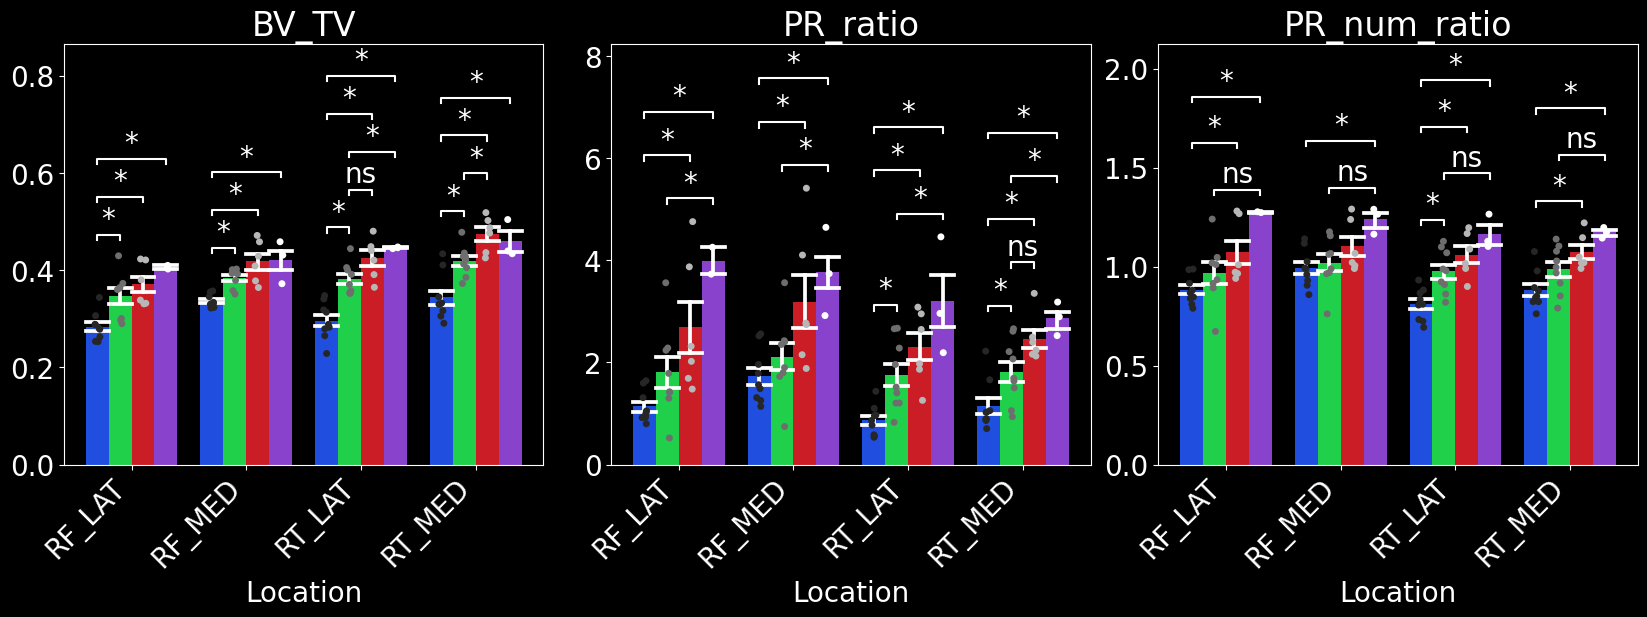

In [24]:
ITS_subplots('BV_TV','PR_ratio','PR_num_ratio')

p-value annotation legend:
        : p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
       *: 1.00e-03 < p <= 1.00e-02
       *: 1.00e-04 < p <= 1.00e-03
       *: p <= 1.00e-04

RT_MED_2 vs. RT_MED_3: t-test independent samples with Benjamini-Hochberg correction, P_val:2.370e-03 t=-3.606e+00
RT_LAT_2 vs. RT_LAT_3: t-test independent samples with Benjamini-Hochberg correction, P_val:3.226e-04 t=-4.558e+00
RF_LAT_2 vs. RF_LAT_3: t-test independent samples with Benjamini-Hochberg correction, P_val:1.984e-02 t=-2.607e+00
RF_MED_2 vs. RF_MED_3: t-test independent samples with Benjamini-Hochberg correction, P_val:3.525e-02 (ns) t=-2.314e+00
RT_MED_3 vs. RT_MED_4: t-test independent samples with Benjamini-Hochberg correction, P_val:3.753e-03 t=-3.522e+00
RT_LAT_3 vs. RT_LAT_5: t-test independent samples with Benjamini-Hochberg correction, P_val:1.207e-02 t=-3.059e+00
RT_MED_2 vs. RT_MED_4: t-test independent samples with Benjamini-Hochberg correction, P_val:2.246e-05 t=-6.427e+00
RT_MED_3 

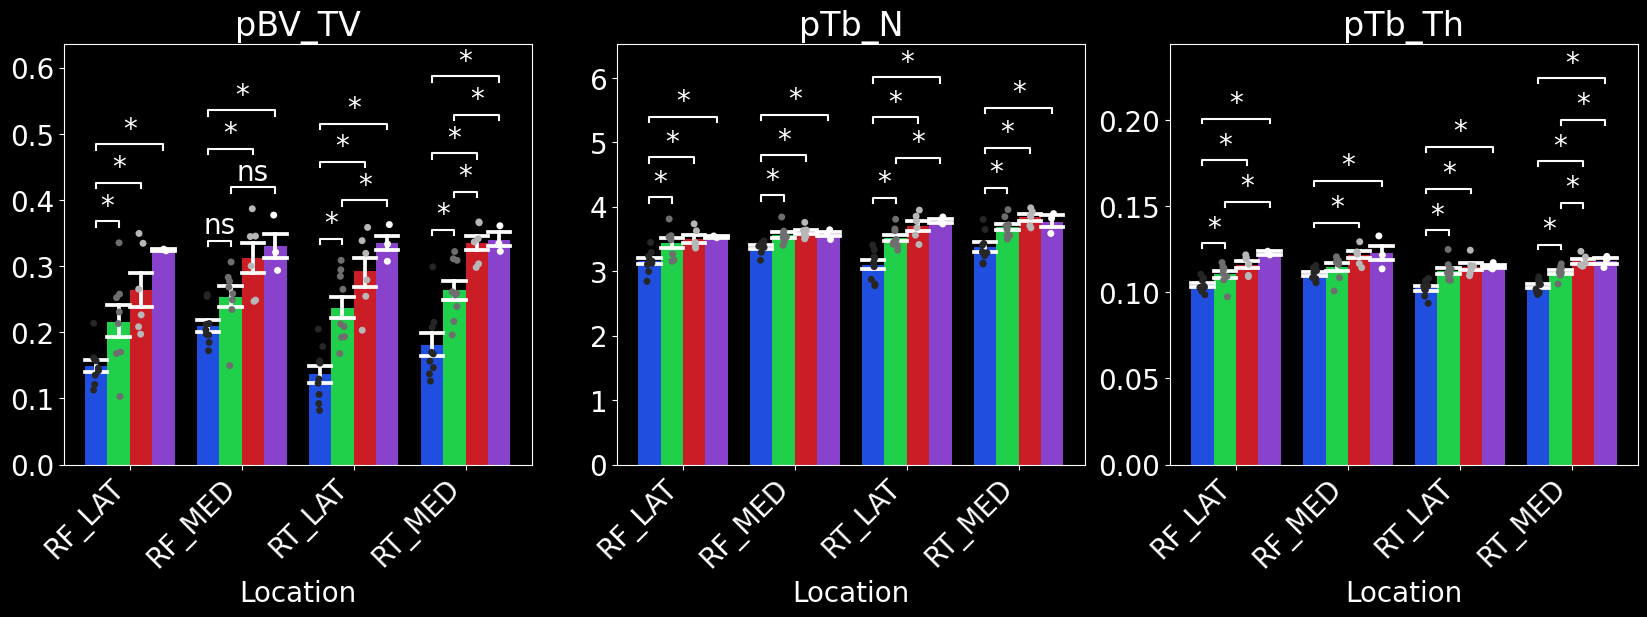

In [25]:
ITS_subplots('pBV_TV','pTb_N','pTb_Th')

p-value annotation legend:
        : p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
       *: 1.00e-03 < p <= 1.00e-02
       *: 1.00e-04 < p <= 1.00e-03
       *: p <= 1.00e-04

RF_LAT_2 vs. RF_LAT_4: t-test independent samples with Benjamini-Hochberg correction, P_val:1.661e-02 (ns) t=2.748e+00
RT_LAT_2 vs. RT_LAT_4: t-test independent samples with Benjamini-Hochberg correction, P_val:3.952e-03 t=3.495e+00
RT_MED_2 vs. RT_MED_5: t-test independent samples with Benjamini-Hochberg correction, P_val:1.498e-02 (ns) t=2.932e+00
RT_LAT_2 vs. RT_LAT_5: t-test independent samples with Benjamini-Hochberg correction, P_val:1.867e-03 t=4.187e+00
RF_LAT_2 vs. RF_LAT_5: t-test independent samples with Benjamini-Hochberg correction, P_val:1.398e-03 t=4.544e+00
RF_MED_2 vs. RF_MED_5: t-test independent samples with Benjamini-Hochberg correction, P_val:1.965e-02 (ns) t=2.774e+00
p-value annotation legend:
        : p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
       *: 1.00e-03 < p <= 1.00e-02

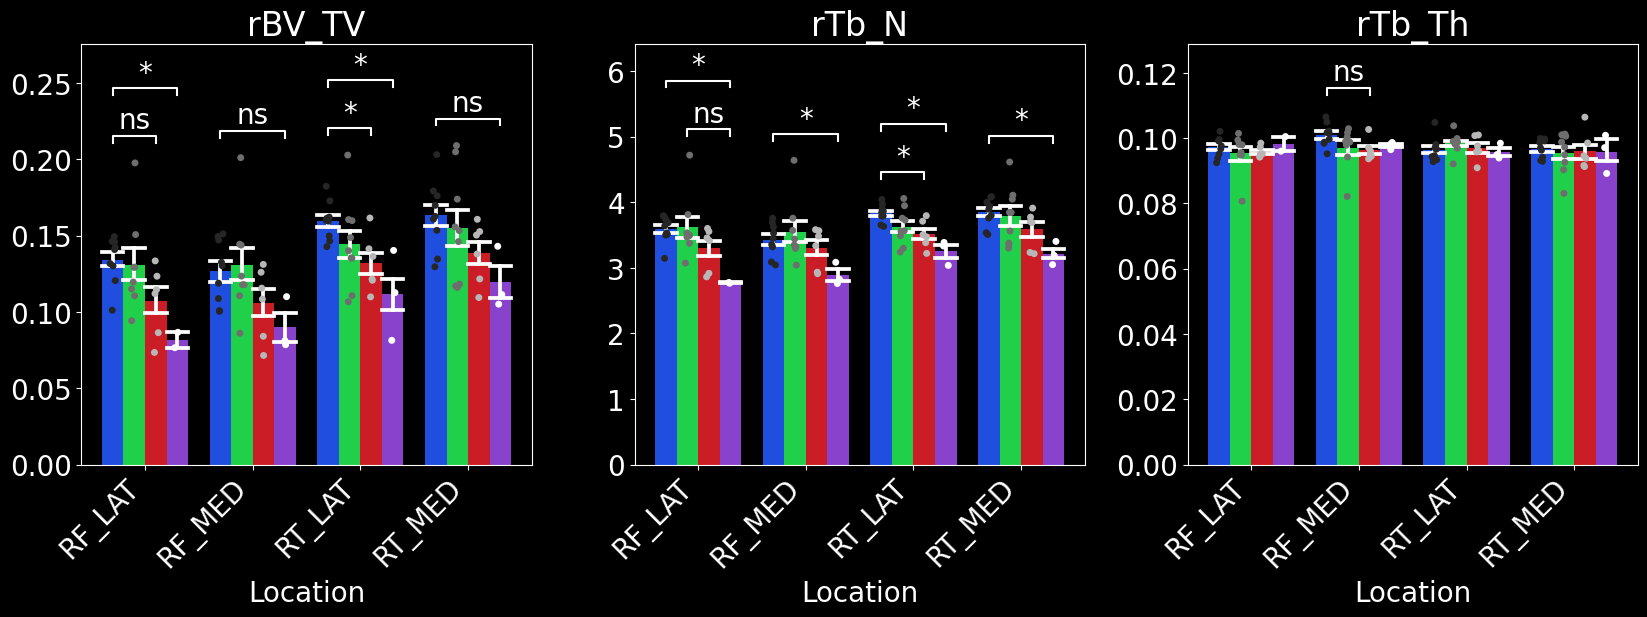

In [26]:
ITS_subplots('rBV_TV','rTb_N','rTb_Th')

In [ ]:
ITS_plot('BV_TV',**hue_plot_params)

In [ ]:
ITS_plot('PR_ratio')

In [ ]:
ITS_plot('PR_num_ratio')

In [ ]:
ITS_plot('pBV_TV')

In [ ]:
ITS_plot('rBV_TV')

In [ ]:
ITS_plot('pTb_Th')

In [ ]:
ITS_plot('rTb_Th')

In [ ]:
ITS_plot('pTb_N')

In [ ]:
ITS_plot('rTb_N')